## Packages

In [1]:
# to get a local copy of the codes from Github
!git clone https://github.com/AHammoudeh/energy.git

Cloning into 'energy'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 13.54 KiB | 4.51 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import sys
sys.path.append('/content/energy')  # Path to the cloned repo

from energy.colab import measure_resource_utilization,  analyze_data

In [3]:
with_GPU = False  #convert to True if you would like to plot the GPU graphs

import torch
device = 'cuda' if with_GPU and torch.cuda.is_available() else 'cpu'

## Python Example

In [6]:
%%writefile File.py
# Your python code:
import time
n = 10**8
out = []
for _ in range(n):
  out += [n]

Overwriting File.py


In [ ]:
'''
#To run a python file
!python3 File.py

Average CPU Utilization: 62.06%
Total run time: 17 sec
Average CPU Utilization: 62.06%
Average Memory Utilization: 39.05%
Average Disk Utilization: 30.30%
Average GPU Utilization: 0.00%
Average GPU Power: 0.00 W
Approx. Colab CPU Power: 6350 W
Approx. Colab CPU Energy: 108171 J


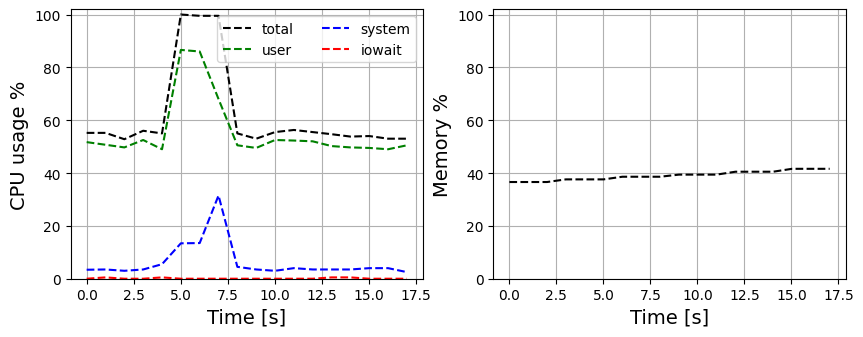

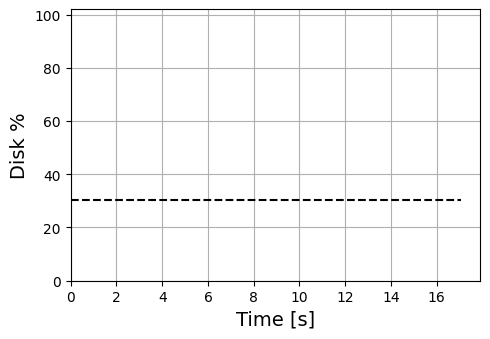

In [7]:
measure_resource_utilization(script_path='File.py', sampling_interval=1, output_file="utilization.csv", device = device)
analyze_data("utilization.csv", with_GPU=False, smoothing_window = 1)

## C++ Example

In [10]:
%%writefile File.cpp
// write your C++ code here
#include <iostream>
#include <vector>

int main() {
    std::vector<int> my_list;
    int n = 100000000;

    for (int i = 0; i < n; i++) {
        my_list.push_back(i);
    }

    return 0;
}

Overwriting File.cpp


In [ ]:
'''
#To run a C++ file (to check if it works correctly and see any errors if any)
!g++ File.cpp -o compiledFile
!./compiledFile

Average CPU Utilization: 53.43%
Total run time: 2 sec
Average CPU Utilization: 53.43%
Average Memory Utilization: 37.10%
Average Disk Utilization: 30.30%
Average GPU Utilization: 0.00%
Average GPU Power: 0.00 W
Approx. Colab CPU Power: 5470 W
Approx. Colab CPU Energy: 9279 J


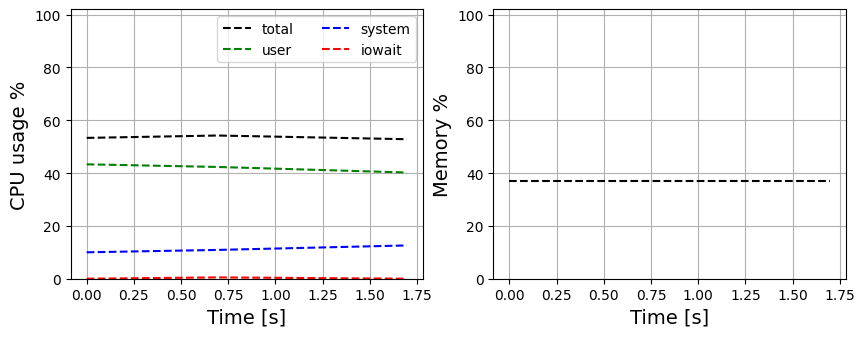

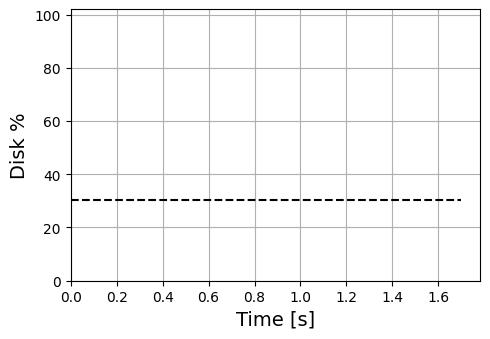

In [11]:
measure_resource_utilization(script_path='File.cpp', sampling_interval=1, output_file="utilization.csv", device = device)
analyze_data("utilization.csv", with_GPU=False, smoothing_window = 1)